In [1]:
import sys; sys.path.insert(0,'../../../mySoftware/MySoftwarePackage/mac'); from plot_tools import *
anafiles_dir = '/Users/erezcohen/Desktop/DensityFluctuations/AnaFiles/csv_files'
%matplotlib inline
from matplotlib.ticker import NullFormatter

# load data

In [2]:
pairs = dict()
for file_name,label in zip(['c12-ico6-10k_rd200','c12-ico0-50k']#,'Pb208-ico3-skin-10k','Pb208-ico0-skin-10k']
                          ,['C12 correlations','C12 no correlations','Pb208 correlations','Pb208 no correlations']):
    pairs[label] = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/'+file_name+'_count_pairs.csv')
    print len(pairs[label]),'distances in ',label

10000 distances in  C12 correlations
10000 distances in  C12 no correlations


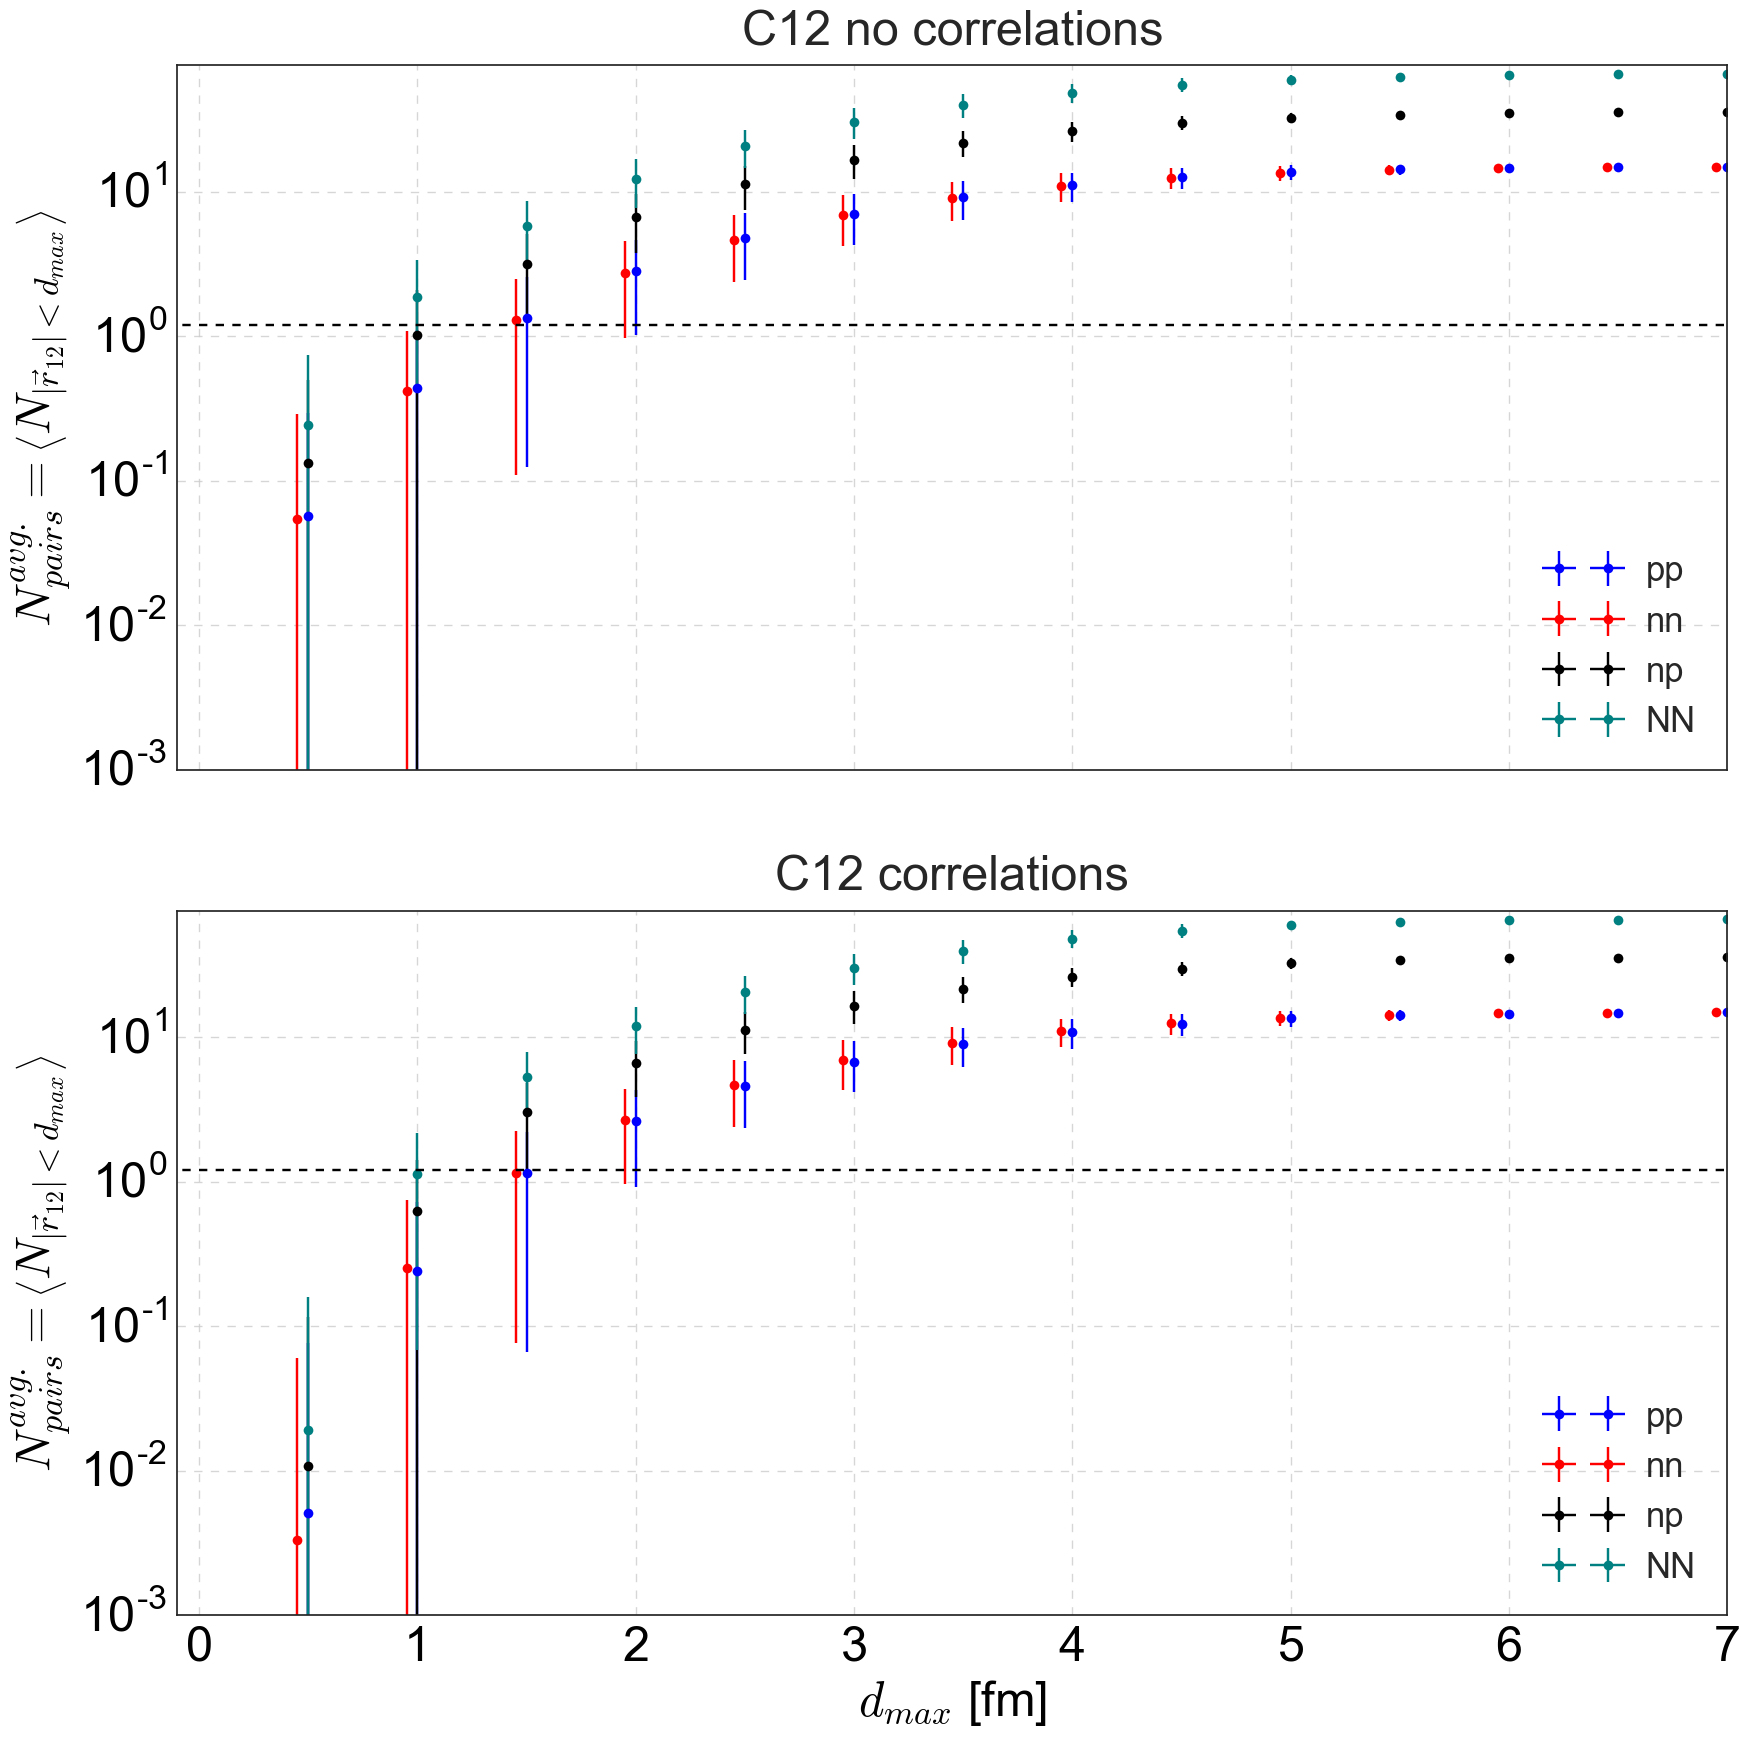

In [15]:
fig = plt.figure(figsize=(20,20))

for i_subplot,label in enumerate(['C12 no correlations','C12 correlations']):
    sample = pairs[label]
    d_arr = np.linspace(0,16.5,34)
    NavgPairs=dict({'pp':[],'nn':[],'np':[],'NN':[]}) 
    NstdPairs=dict({'pp':[],'nn':[],'np':[],'NN':[]})
    for d in d_arr:
        for pair_type in ['pp','nn','np','NN']:
            x = sample['N'+pair_type+' < %.1f fm'%d]
            NavgPairs[pair_type].append(np.average(x))
            NstdPairs[pair_type].append(np.std(x))
        
    ax = fig.add_subplot(2,1,i_subplot+1)
    for i,(pair_type,color) in enumerate(zip(['pp','nn','np','NN'],['blue','red','black','teal'])):
        plt.errorbar( d_arr-0.05*i*np.ones(len(d_arr)) if i<2 else d_arr , xerr=0 , y=NavgPairs[pair_type] , yerr=NstdPairs[pair_type] , fmt='o', label=pair_type, color=color)
    set_axes(ax,'$d_{max}$ [fm]' if i_subplot==1 else '' # ($N_{pairs}$ at $d<d_{max}$)
             ,'$N_{pairs}^{avg.} = \\left< N_{|\\vec{r}_{12}|<d_{max}}\\right>$'
             ,fontsize=35,do_add_grid=True,title=label)
    if i_subplot==0: ax.xaxis.set_major_formatter(NullFormatter())
    plt.legend(fontsize=25,loc='lower right',numpoints=2)
    ax.plot(ax.get_xlim(),[1.2,1.2],'--',color='black')
#     ax.plot(ax.get_xlim(),[36,36],'--',color='black')
    ax.set_xlim(-0.1,7);ax.set_ylim(0.001,75);    
    ax.set_yscale('log')

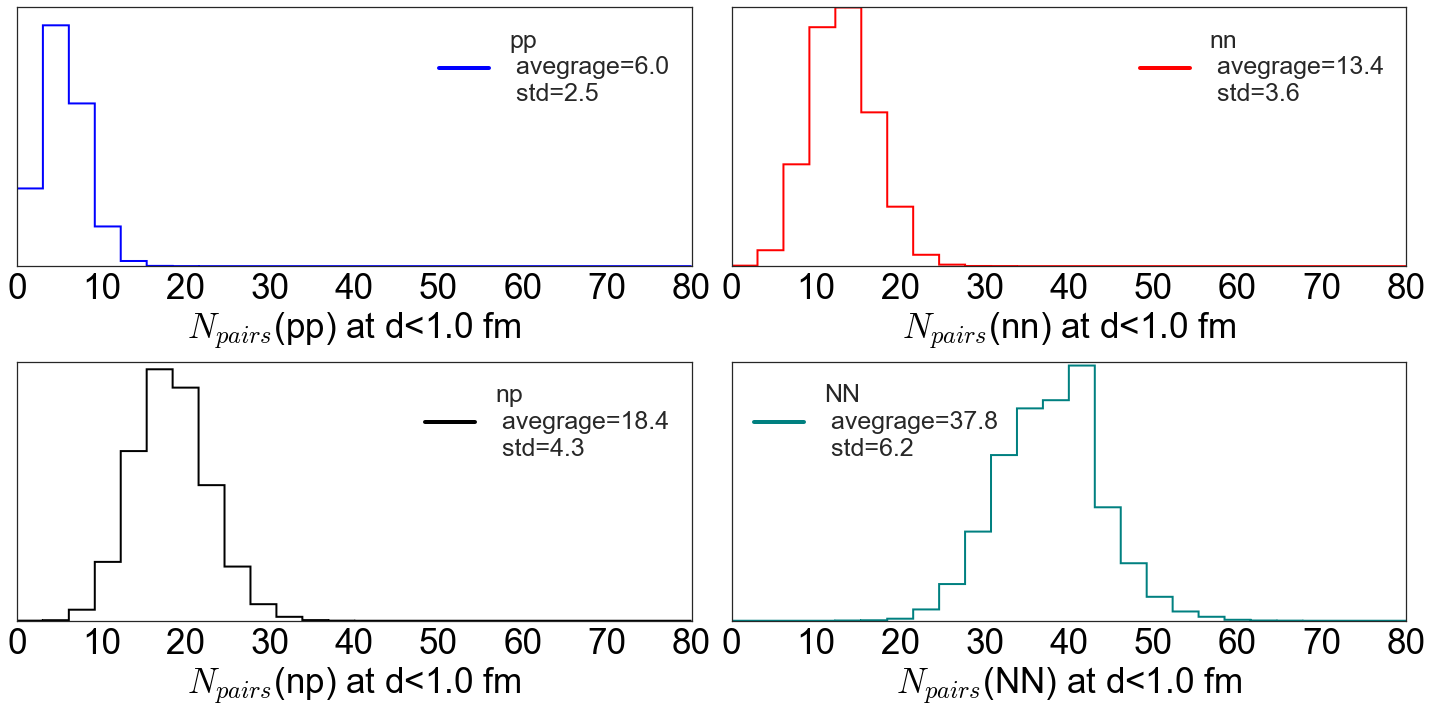

In [32]:
# a plot to send Massi
d = 1.0 # fm
fig = plt.figure(figsize=(20,10))
bins = np.linspace(0,80,27)
for i,(pair_type,color) in enumerate(zip(['pp','nn','np','NN'],['blue','red','black','teal'])):
    ax = fig.add_subplot(2,2,i+1)
    x = pairs['N'+pair_type+' < %.1f fm'%d]
    plt.hist( x , bins=bins,color=color, histtype='step',linewidth=2,normed=1)
    average = np.average(x)
    std = np.std(x)
    plt.plot([0,0],[0,0],label=pair_type+'\n avegrage=%.1f\n std=%.1f'%(average,std),linewidth=4,color=color)        
    set_axes(ax,'$N_{pairs}$('+pair_type+') at d<%.1f fm'%d,fontsize=35
#              ,xticks=[0,1,2,3,4,5]
#              ,xticks=[0,1,2,3,4,5]
            )
    plt.legend(fontsize=25,loc='upper right' if i<3 else 'upper left')
    ax.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()

UnboundLocalError: local variable 'ymin' referenced before assignment

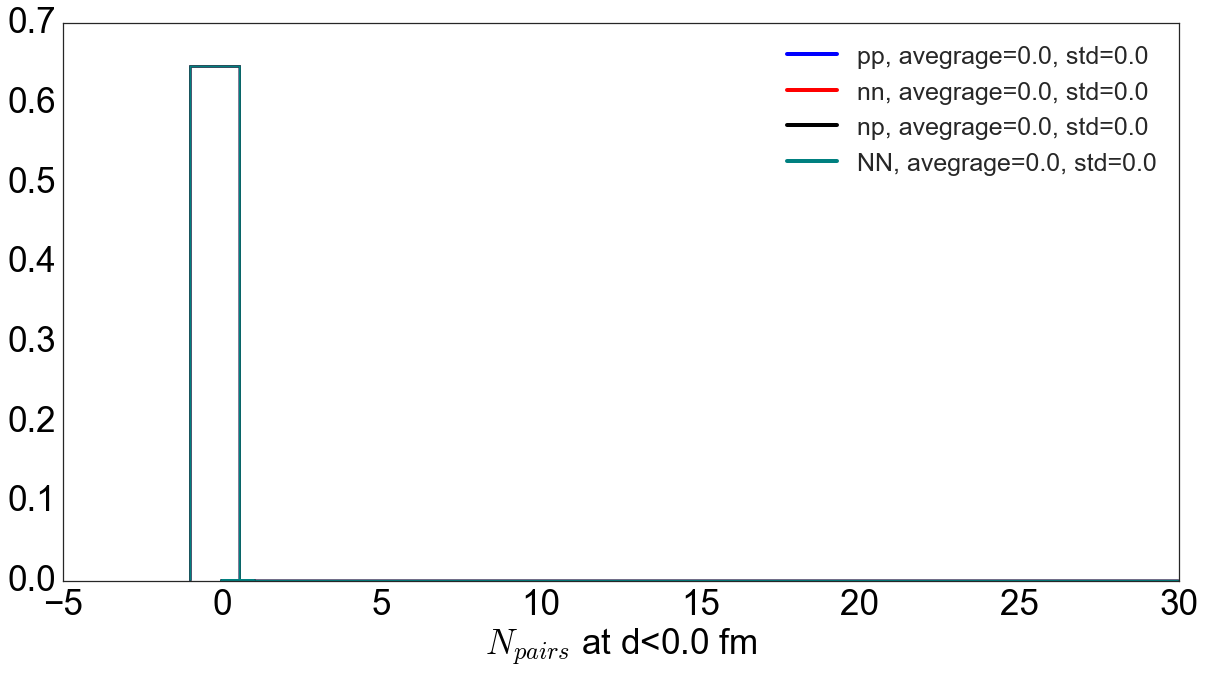

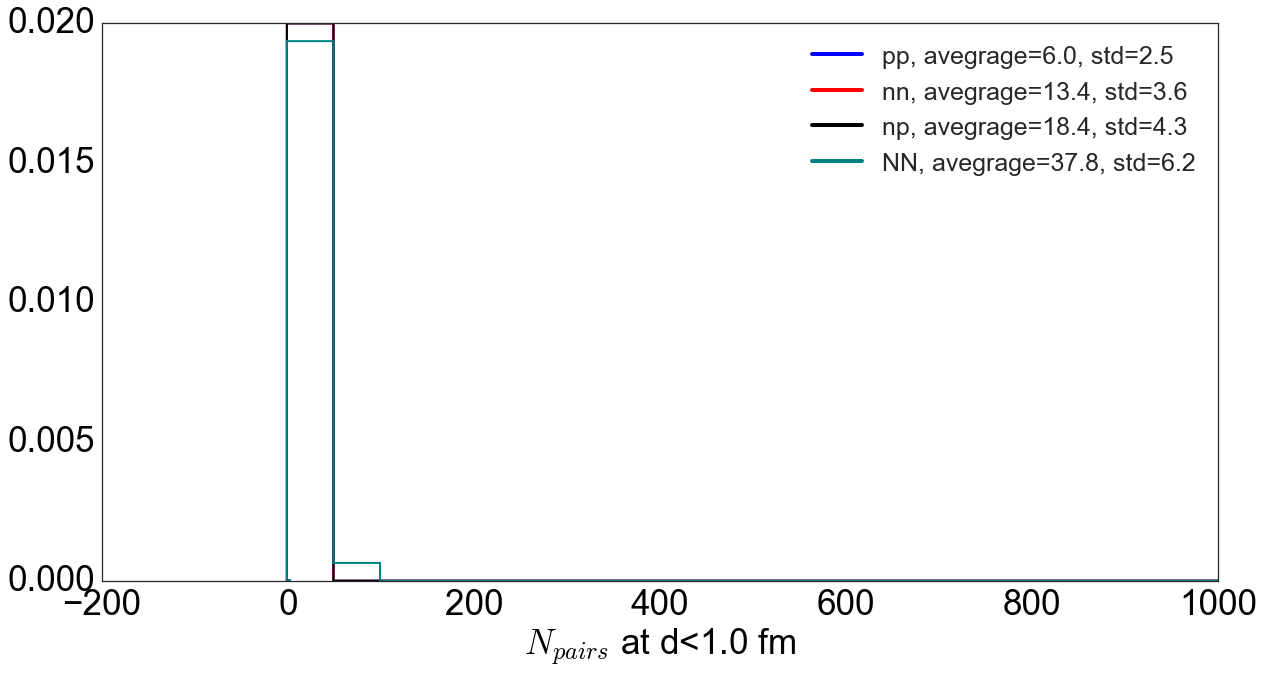

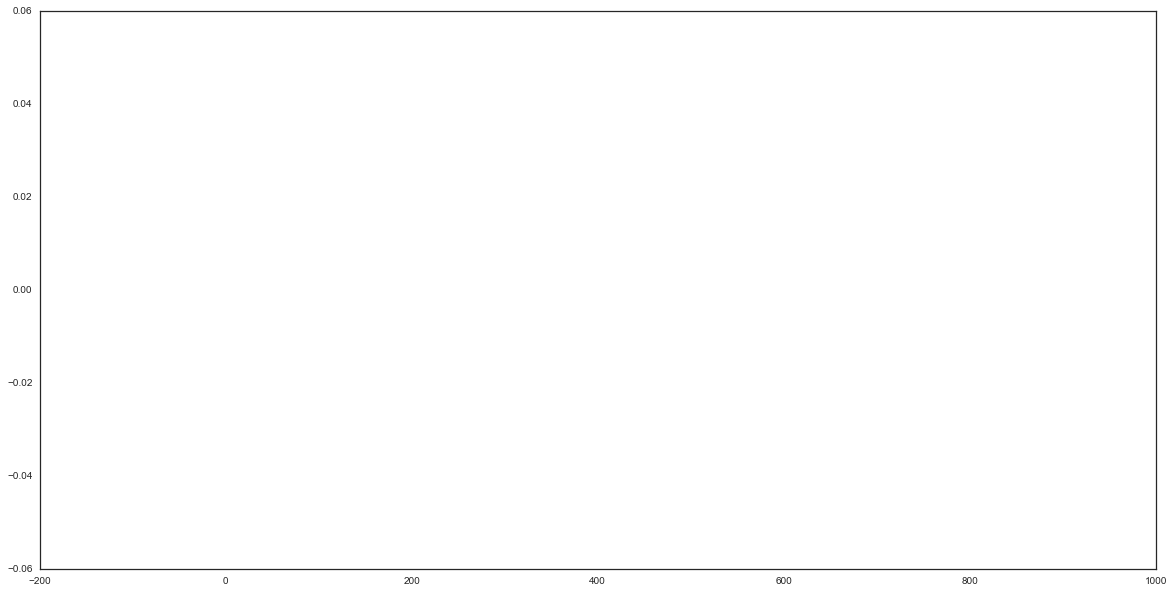

In [24]:
# for d,Nmax in zip([0.0,0.5,1,1.5,2.,2.5,3,10],[36,36,36,36,36,36,36,36]):
for d,Nmax in zip([0.0,1.0,7.],[30,1000,1000]):
    bins = np.linspace(-1,Nmax,21)

    fig, ax = plt.subplots(figsize=(20,10))
    for pair_type,color in zip(['pp','nn','np','NN'],['blue','red','black','teal']):
        x = pairs['N'+pair_type+' < %.1f fm'%d]
        plt.hist( x , bins=bins,color=color, histtype='step',linewidth=2,normed=1)
        average = np.average(x)
        std = np.std(x)
        plt.plot([0,0],label=pair_type+', avegrage=%.1f, std=%.1f'%(average,std),linewidth=4,color=color)
        
    set_axes(ax,'$N_{pairs}$ at d<%.1f fm'%d,fontsize=35)
    plt.legend(fontsize=25)

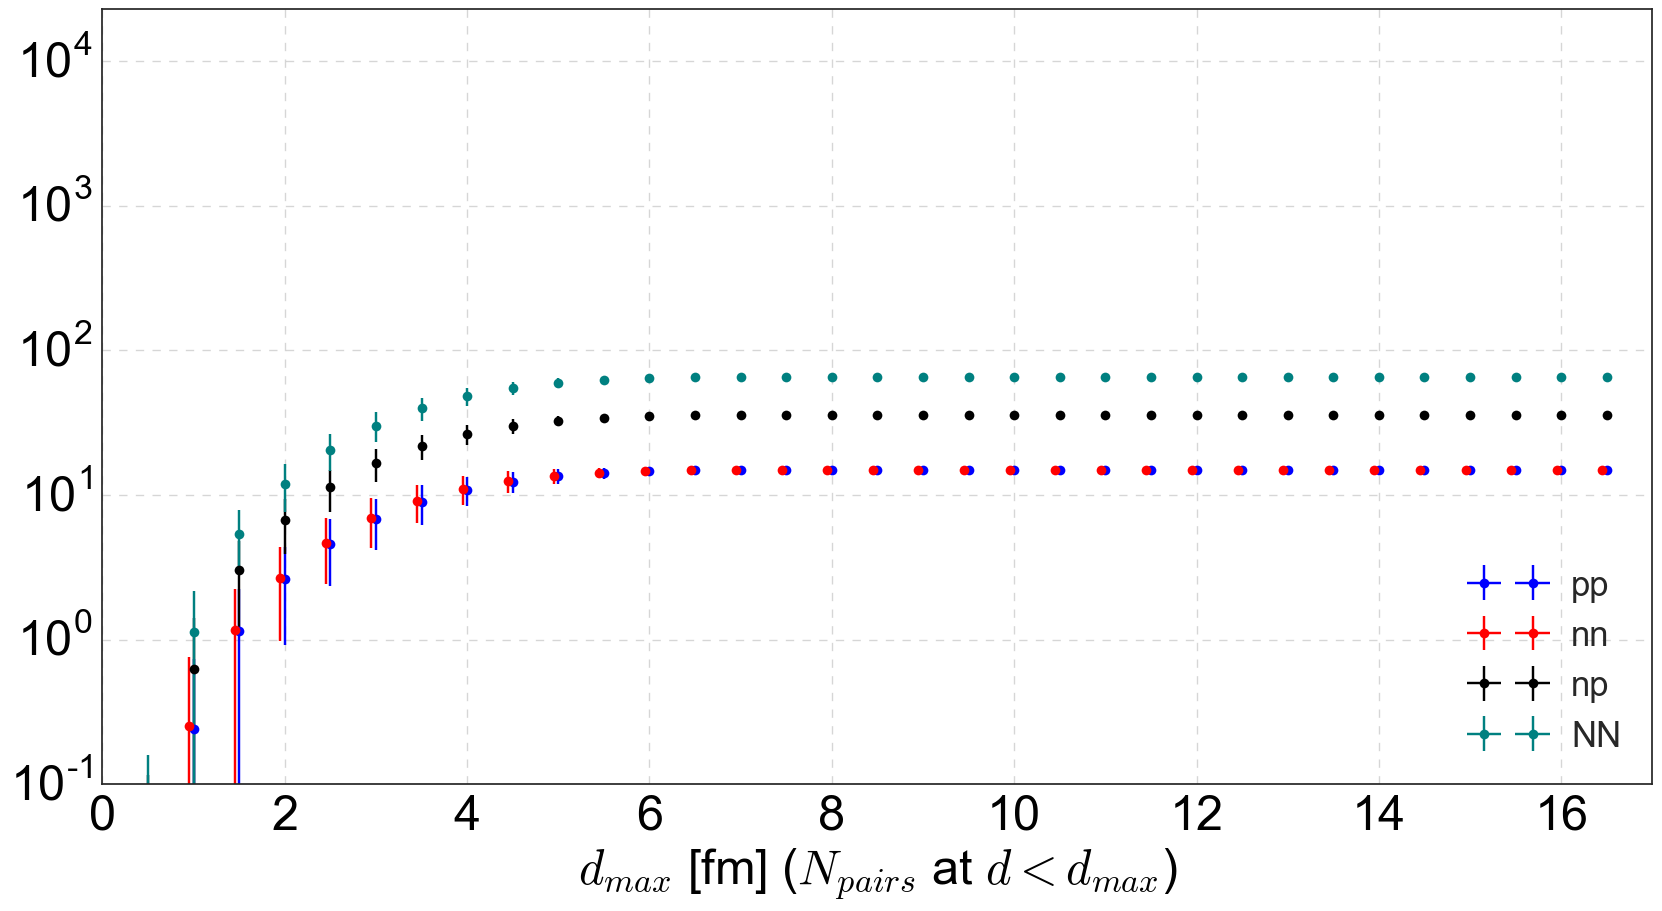

In [4]:
label = 'Pb208 no correlations'
sample = pairs[label]
d_arr = np.linspace(0,16.5,34)
NavgPairs=dict({'pp':[],'nn':[],'np':[],'NN':[]}) 
NstdPairs=dict({'pp':[],'nn':[],'np':[],'NN':[]})
for d in d_arr:
    for pair_type in ['pp','nn','np','NN']:
        x = sample['N'+pair_type+' < %.1f fm'%d]
        NavgPairs[pair_type].append(np.average(x))
        NstdPairs[pair_type].append(np.std(x))
        
fig, ax = plt.subplots(figsize=(20,10))
for i,(pair_type,color) in enumerate(zip(['pp','nn','np','NN'],['blue','red','black','teal'])):
    plt.errorbar( d_arr-0.05*i*np.ones(len(d_arr)) if i<2 else d_arr , xerr=0 , y=NavgPairs[pair_type] , yerr=NstdPairs[pair_type] , fmt='o', label=pair_type, color=color)
set_axes(ax,'$d_{max}$ [fm] ($N_{pairs}$ at $d<d_{max}$)',fontsize=35,do_add_grid=True)
plt.legend(fontsize=25,loc='lower right',numpoints=2)
# ax.plot(ax.get_xlim(),[1.2,1.2],'--',color='black')
# ax.plot(ax.get_xlim(),[36,36],'--',color='black')
# ax.set_xlim(-0.1,7);ax.set_ylim(0.01,70);    
ax.set_xlim(0,17);ax.set_ylim(0.1,23000);    
ax.set_yscale('log')
